In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglogUKC import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv4 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_val_test(ablation=1000, designated_ukc_cls=4)
train_data, val_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
class 4 is add as ukc
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=val_data, epochs=7) 

vocab_size: 50
Epoch 1/7
100/100 [==============================] - 10s 93ms/step - loss: 0.3155 - accuracy: 0.8722 - precision: 0.9308 - recall: 0.8116 - val_loss: 0.0288 - val_accuracy: 0.9974 - val_precision: 0.9974 - val_recall: 0.9974
Epoch 2/7
100/100 [==============================] - 9s 92ms/step - loss: 0.0563 - accuracy: 0.9800 - precision: 0.9800 - recall: 0.9800 - val_loss: 0.0142 - val_accuracy: 0.9974 - val_precision: 0.9974 - val_recall: 0.9948
Epoch 3/7
100/100 [==============================] - 9s 93ms/step - loss: 0.0358 - accuracy: 0.9869 - precision: 0.9869 - recall: 0.9866 - val_loss: 0.0096 - val_accuracy: 0.9948 - val_precision: 0.9948 - val_recall: 0.9948
Epoch 4/7
100/100 [==============================] - 9s 94ms/step - loss: 0.0231 - accuracy: 0.9906 - precision: 0.9906 - recall: 0.9903 - val_loss: 0.0087 - val_accuracy: 0.9974 - val_precision: 0.9974 - val_recall: 0.9948
Epoch 5/7
100/100 [==============================] - 9s 93ms/step - loss: 0.0165 - accur

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.69it/s]


epoch: 1/50, train_loss: 5.874927520751953, eval_score: 0.4758198711630556


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.85it/s]


epoch: 2/50, train_loss: 5.87492561340332, eval_score: 0.8156537545104839


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 3/50, train_loss: 5.8749260902404785, eval_score: 0.8651790063614843


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.70it/s]


epoch: 4/50, train_loss: 5.8749260902404785, eval_score: 0.9188172043010754


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 5/50, train_loss: 5.87492561340332, eval_score: 0.932997438337554


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.62it/s]


epoch: 6/50, train_loss: 5.874927520751953, eval_score: 0.9697134423161821


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 7/50, train_loss: 5.874926567077637, eval_score: 0.9767551289290419


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.69it/s]


epoch: 8/50, train_loss: 5.874926567077637, eval_score: 0.9808563680159011


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.69it/s]


epoch: 9/50, train_loss: 5.87492561340332, eval_score: 0.9830428070023254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 10/50, train_loss: 5.874926567077637, eval_score: 0.9855237858728981


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 11/50, train_loss: 5.874926567077637, eval_score: 0.9869991591985726


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


epoch: 12/50, train_loss: 5.874927520751953, eval_score: 0.9883090421338423


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 13/50, train_loss: 5.874927520751953, eval_score: 0.9889616065129474


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 14/50, train_loss: 5.8749260902404785, eval_score: 0.9894469895907807


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.72it/s]


epoch: 15/50, train_loss: 5.874927520751953, eval_score: 0.9897720311650551


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.41it/s]


epoch: 16/50, train_loss: 5.874925136566162, eval_score: 0.9902557799882876


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.63it/s]


epoch: 17/50, train_loss: 5.87492561340332, eval_score: 0.9909033967782278


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.65it/s]


epoch: 18/50, train_loss: 5.874926567077637, eval_score: 0.9910619173375518


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.66it/s]


epoch: 19/50, train_loss: 5.8749260902404785, eval_score: 0.9910640860951987


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.67it/s]


epoch: 20/50, train_loss: 5.8749260902404785, eval_score: 0.9915513391995807


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.69it/s]


epoch: 21/50, train_loss: 5.874927520751953, eval_score: 0.9917092626951225


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.65it/s]


epoch: 22/50, train_loss: 5.87492561340332, eval_score: 0.9918735123119415


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.69it/s]


epoch: 23/50, train_loss: 5.8749260902404785, eval_score: 0.9918815944329629


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.66it/s]


epoch: 24/50, train_loss: 5.874925136566162, eval_score: 0.9918815944329629


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.67it/s]


epoch: 25/50, train_loss: 5.87492561340332, eval_score: 0.9918815944329629


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.67it/s]


epoch: 26/50, train_loss: 5.8749237060546875, eval_score: 0.9920454243766642


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.79it/s]


epoch: 27/50, train_loss: 5.8749260902404785, eval_score: 0.9920454243766642


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.78it/s]


epoch: 28/50, train_loss: 5.874926567077637, eval_score: 0.9922110074345107


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.78it/s]


epoch: 29/50, train_loss: 5.8749260902404785, eval_score: 0.9922110074345107


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.80it/s]


epoch: 30/50, train_loss: 5.874927997589111, eval_score: 0.9922110074345107


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.77it/s]


epoch: 31/50, train_loss: 5.874926567077637, eval_score: 0.9922110074345107


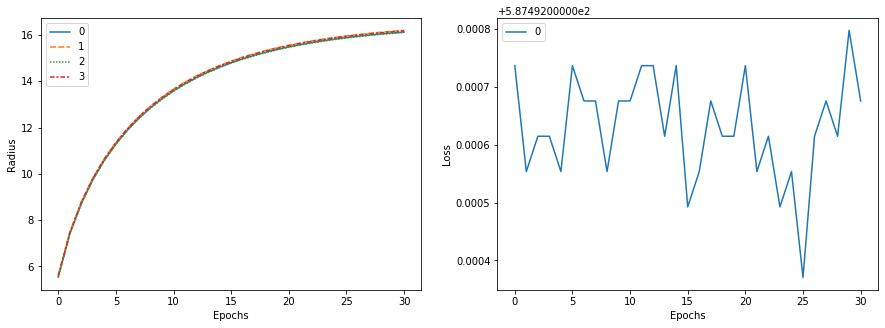

In [5]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate=5, wait_patient=3,)

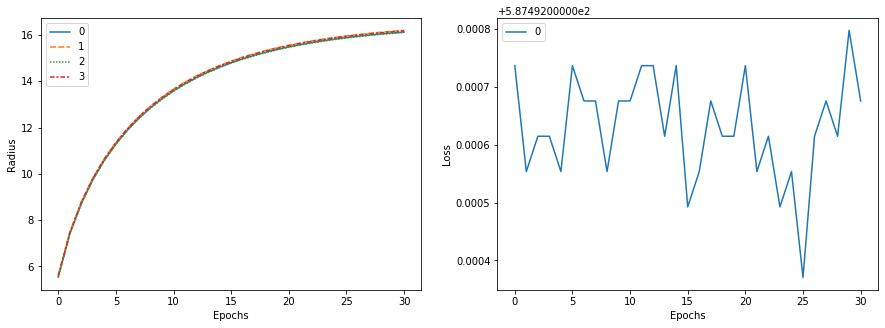

euc_dis: tf.Tensor(
[ 3.6995544  8.31263    7.38055   15.977601   2.8011549  5.9402876
 14.846871   3.928675   6.0993905  8.936529   3.5191274 17.92009
  3.8956358  3.9860582 11.697588  11.471016  11.926787   3.3722355
  2.4124885 12.340971   6.4215164  4.3932085  2.486958   8.32264
  7.2077255  5.3400483 15.961969  10.913751   7.1286783 11.177291
  3.7766235 16.00398  ], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[16.044039 16.066252 16.066252 15.992851 16.066252 16.044039 15.972182
 15.992851 16.066252 15.972182 16.066252 16.044039 15.992851 15.992851
 15.972182 15.972182 15.972182 15.992851 15.992851 15.972182 16.066252
 16.044039 15.992851 16.066252 16.066252 16.044039 15.972182 15.972182
 16.066252 16.066252 15.992851 16.044039], shape=(32,), dtype=float32)
predictions with unknown-9999: [  3   1   1   0   1   3   2   0   1   2   1 999   0   0   2   2   2   0
   0   2   1   3   0   1   1   3   2   2   1   1   0   3]
[[800   0   0   0   0]
 [  0 800   0   0   0]
 [  0   0 

In [6]:
oset.plot_radius_chages()
preds = oset.openpredict(oset.features)
y_true, y_pred, _ = oset.evaluate(train_data, zero_div=0)

In [7]:
y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=4)

[[94  0  0  0  0]
 [ 0 95  0  0  0]
 [ 0  0 98  0  0]
 [ 0  0  0  2  0]
 [ 0  0  1 94  0]]
75.26
f1_weighted: 0.7463129445940813, f1_macro: 0.6071480368797265, f1_micro: 0.7526041666666665, f_measure: {'Known': 75.8935, 'Open': 0, 'F1-score': 60.7148}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        95
           2       0.99      1.00      0.99        98
           3       0.02      1.00      0.04         2
           4       0.00      0.00      0.00        95

    accuracy                           0.75       384
   macro avg       0.60      0.80      0.61       384
weighted avg       0.74      0.75      0.75       384

